# Soluzioni del compito del 2/7/2025

## Esercizio 1A

Supponiamo di avere un file di testo le cui righe hanno il seguente formato:
  * un carattere iniziale, che può essere solo `r` oppure `l`;
  * due numeri interi che rappresentano le coordinate $x$ ed $y$ di un punto;
  * altri due numeri interi che rappresentano le coordinate $x$ ed $y$ di un secondo punto.

Il carattere iniziale e i numeri sono separati tra loro da caratteri spazio. Scrivere un programma che legge un file dal nome `disegno.txt` che rispetta il formato di cui sopra. Per ogni riga letta dal file, usando la libreria *ezgraphics*, il programma deve:
  * se il carattere iniziale è `l`, disegnare una linea tra i due punti specificati;
  * se il carattere iniziale è `r`, disegnare un rettangolo con i due punti specificati come vertici opposti.

Ad esempio, se il file `disegno.txt` contiene:
```text
r 100 100 200 200
l 0 0 100 100
l 200 100 300 0
```
il programma dovrà disegnare qualcosa di simile a questo:

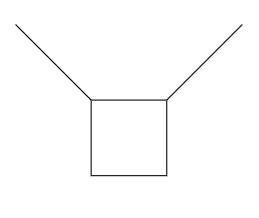

### Soluzione

In [ ]:
from ezgraphics import GraphicsWindow

win = GraphicsWindow()
canvas = win.canvas()
# Apro il file
with open("disegno.txt") as f:
    # Leggo il file una riga alla volta.
    for line in f:
        # Separo la linea appena letta nelle sue componenti.
        c, x1, y1, x2, y2 = line.split()
        if c == "l":
            # Disegno una riga, ma prima devo convertire le coordinate in interi.
            canvas.drawLine(int(x1), int(y1), int(x2), int(y2))
        else:
            # Si ricorda che gli ultimi due argomenti di drawRect sono larghezza e altezza,
            # che quindi vanno calcolati.
            canvas.drawRect(int(x1), int(y1), int(x2)-int(x1), int(y2)-int(y1))
win.wait()

## Esercizio 2A

Scrivere una funzione *righe_monotone* che prende come parametro una tabella, anche frastagliata, e restituisce una lista di booleani (un booleano per ogni riga) che indica quali righe della tabella sono monotone. Una riga è monotona se tutti i suoi elementi sono in ordine strettamente crescente o decrescente.

Ad esempio, se la funzione è chiamata con la matrice
```python
[[1,  2,  4,  7],
 [5,  5,  5,  5],
 [3,  2, -1],
 [1,  2,  3,  2]]
```
il risultato sarà 
```python
[True, False, True, False]
```
perché la prima e la terza riga sono monotone, ma la seconda e la quarta no.

### Soluzione

Questa soluzione usa due funzioni ausiliarie che determinano se un riga è crescente o decrescente.

In [ ]:
def riga_crescente(l):
    """
    Retistuisce True se gli elementi di l sono in ordine strettamente crescente.
    """
    for i in range(len(l)-1):
        # Se trovo due elementi consecutivi che NON SONO in ordine strettamente crescente, restituisco False.
        if l[i] >= l[i+1]:
            return False
    # Se sono arrivato qui vuol dire che tutti gli elementi consecutivi sono nell'ordine corretto.
    return True

def riga_decrescente(l):
    """
    Retistuisce True se gli elementi di l sono in ordine strettamente decrescente.
    """
    for i in range(len(l)-1):
        if l[i] <= l[i+1]:
            return False
    return True

def righe_monotone(t):
    res = []
    for riga in t:
        res.append(riga_crescente(riga) or riga_decrescente(riga))
    return res


E questo è l'esempio.

In [14]:
m = [
    [1, 2, 4, 7],
    [5, 5, 5, 5],
    [3, 2, -1],
    [1, 2, 3, 2]
]
righe_monotone(m)

[True, False, True, False]

## Esercizio 3A

Utilizzare il framework *pytest* per collaudare la funzione *righe_monotone* dell'esercizio precedente. Si considerino in particolare i casi corrispondenti ai seguenti parametri in input:
  * l'esempio fornito nel testo dell'esercizio;
  * una tabella vuota (senza righe);
  * una tabella che ha almeno due righe, una vuota e una no;
  * una tabella che ha almeno due righe, tutte vuote.

### Soluzione

Notare che questa soluzione usa `ipytest` perché si trova all'interno di un notebook, ma nel vostro caso non era richiesto. Tutti i riferimenti a `ipytest` possono essere eliminati se non si lavora sui notebook.

In [ ]:
# inizializzazione di ipytest
import ipytest
ipytest.autoconfig()

In [19]:
%%ipytest

def test1():
    m = [[1,  2,  4,  7],
        [5,  5,  5,  5],
        [3,  2, -1],
        [1,  2,  3,  2]]
    assert righe_monotone(m) == [True, False, True, False]

def test2():
    assert righe_monotone([]) == []
    assert righe_monotone([[], [1,2,3]]) == [True, True]
    assert righe_monotone([[], []]) == [True, True]

..                                                                                           [100%]
2 passed in 0.00s


## Esercizio 1B

Supponiamo di avere un file di testo le cui righe hanno due possibili formati:
  *  il carattere iniziale `c`, seguito da due numeri che rappresentano le coordinate $x$ ed $y$ del centro di un cerchio, seguiti da un terzo numero che rappresenta il raggio del cerchio; il carattere iniziale e i numeri sono separati tra di loro da spazi;
  * un carattere iniziale diverso da `c`, seguito da qualsiasi cosa.

Scrivere un programma che legge un file dal nome `disegno.txt` che rispetta le specifiche di cui sopra. Per ogni riga letta dal file, usando la libreria *ezgraphics*, il programma deve:
  * se il carattere iniziale è `c`, disegnare un cerchio di centro e raggio specificato;
  * se il carattere iniziale è diverso da `c`, ignorare la riga.

Ad esempio, se il file `disegno.txt` contiene:
```text
c 100 100 100
hello world
c 100 100 50
```
il programma dovrà disegnare qualcosa di simile a questo:

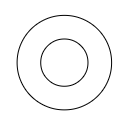


### Soluzione

In [ ]:
from ezgraphics import GraphicsWindow

win = GraphicsWindow()
canvas = win.canvas()
# Apro il file
with open("disegno.txt") as f:
    # Leggo il file una riga alla volta.
    for line in f:
        if line[0] == "c":
            # Se la riga inizia con c, la separo nelle sue componenti.
            _, x, y, r = line.split()
            # Ricordiamo che gli argomenti di drawOval NON SONO centro e raggio, ma le coordinata del punto
            # in alto a sinistra, la larghezza e l'altezza del rettangolo circoscritto all'ovale che si vuole
            # disegnare. Devo quindi calcolarmi questi valori, ricordando anche di convertire le variabili
            # stringa x, y ed r in interi.
            canvas.drawOval(int(x)-int(r), int(y)-int(r), 2*int(r), 2*int(r))

win.wait()

## Esercizio 2A

Scrivere una funzione *righe_progressione* che prende in input una tabella (anche frastagliata) e restituisce una lista con i numeri delle righe che rappresentano una progressione aritmetica. Una riga è una progressione aritmetica se la differenza tra ogni elemento e il precedente è costante.

Ad esempio, se la funzione è chiamata con la matrice
```python
[[1, 2, 3, 4],
 [5, 5, 5],
 [1, 2, 3, 10],
 [3, 1, -1, -3]]
```
il risultato è
```python
[0, 1, 3]
```

Infatti la riga numero 0 è una progressione aritmetica (la differenza tra un numero e il precedente è sempre 1), la riga numero 1 è una progressione aritmetica (la differenza tra un numero e il precedente è sempre 0), la riga numero 3 è una progressione aritmetica (la differenza tra un numero e il precedente è sempre -2). La riga 2, invece non è una progressione aritmetica.

### Soluzione

Questa soluzione usa una funzione ausiliaria *riga_progressione* che determina se una lista è una progressione aritmetica oppure no. La funzione controlla la differenza esistente tra il primo e il secondo elemento, e poi verifica se essa corrisponde o no alla differenza gli elementi in tutte le posizioni consecutive.

In [ ]:
def riga_progressione(l):
    """
    Restituisce True se l è una progressione aritmetica, False altrimenti.
    """
    # Liste di zero o un elemento sono sicuramente progressioni.
    if len(l) < 2:
        return True
    # Calcolo la differenza tra i primi due elementi.
    step = l[1] - l[0]
    for i in range(len(l)-1):
        # Se la differenza tra due elementi consecutivi non corrisponde a step, allora non
        # è una progressione aritmetica.
        if l[i+1] - l[i] != step:
            return False
    # Se siamo arrivati qui vuol dire che l è una progressione aritmetica.
    return True

def righe_progressione(t):
    res = []
    for i in range(len(t)):
        if riga_progressione(t[i]):
            res.append(i)
    return res

E questo è l'esempio del testo.

In [3]:
m = [[1, 2, 3, 4],
 [5, 5, 5],
 [1, 2, 3, 10],
 [3, 1, -1, -3]]

righe_progressione(m)

[0, 1, 3]

## Esercizio 3B

Utilizzare il framework *pytest* per collaudare la funzione *righe_progressione* dell'esercizio precedente. Si considerino in particolare i casi corrispondenti ai seguenti parametri in input:
  * l'esempio fornito nel testo dell'esercizio;
  * una tabella vuota (senza righe);
  * una tabella che ha almeno due righe, una vuota e una no;
  * una tabella che ha almeno due righe, tutte vuote.

### Soluzione

Notare che questa soluzione usa `ipytest` perché si trova all'interno di un notebook, ma nel vostro caso non era richiesto. Tutti i riferimenti a `ipytest` possono essere eliminati se non si lavora sui notebook.

In [ ]:
# inizializzazione di ipytest
import ipytest
ipytest.autoconfig()

In [5]:
%%ipytest

def test1():
    m = [[1, 2, 3, 4],
        [5, 5, 5],
        [1, 2, 3, 10],
        [3, 1, -1, -3]]
    assert righe_progressione(m) == [0, 1, 3]

def test2():
    assert righe_progressione([[], [1,2,5]]) == [0]
    assert righe_progressione([[], []]) == [0, 1]

..                                                                                           [100%]
2 passed in 0.01s


## Esercizio 1C


Scrivere un programma che utilizza la libreria *ezgraphics* per realizzare un semplice gioco. Il programma deve disegnare un quadrato rosso di dimensioni 20x20 pixel. Il quadrato deve inizialmente trovarsi in una posizione casuale all'interno della finestra grafica. Ogni volta che si preme il tasto freccia a destra (mentre è attiva la finestra grafica), il quadrato si sposta di 20 pixel verso destra; ogni volta che si preme il tasto freccia sinistra, il quadrato si sposta di 20 pixel verso sinistra. Analogamente per i tasti freccia in alto e freccia in basso.

Non appena il quadrato esce dal bordo della finestra grafica, il gioco si interrompe e compare un messaggio (sul terminale) con il numero di spostamenti effettuati prima di uscire dal bordo.

*Suggerimento*: per gestire gli eventi di pressione dei tasti, si può utilizzare il metodo `getKey` dell'oggetto `GraphicsWindow`. Tocca a voi scoprire come riconoscere i tasti freccia.

### Soluzione

In [4]:
from ezgraphics import GraphicsWindow
from random import randrange

# dimensione del lato del quadrato
SIZE = 20

# spostamento
DELTA = 20

# dimensione della finestra
WINSIZE = 400

# apro finestra grafica e imposto colore rosso
win = GraphicsWindow()
canvas = win.canvas()
canvas.setColor("red")

# genero posizione casuale, e faccio in modo che sia un multiplo di SIZE
x = randrange(WINSIZE) // SIZE * SIZE
y = randrange(WINSIZE) // SIZE * SIZE

# variabile che tiene conto del numero di spostamenti eseguiti
moves = 0

while 0 <= x < WINSIZE and 0 <= y < WINSIZE:

    # cancello canvas e disegno rettangolo alla posizione corrente
    canvas.clear()
    canvas.drawRectangle(x, y, SIZE, SIZE)

    # aspetto pressione di un tasto
    k = win.getKey()

    # determina spostamento
    if k == "Up":
        y -= DELTA
    elif k == "Down":
        y += DELTA
    elif k == "Left":
        x -= DELTA
    elif k == "Right":
        x += DELTA

    # aggiorno variabile con numero di mosse
    moves += 1

win.close()
print("Mosse fatte:", moves)


Mosse fatte: 13


## Esercizio 2C

Scrivere una funzione *genera_tabella* che prende come parametro una lista di coppie. Ogni coppia è formata da due numeri interi positivi o nulli. Ad esempio, un argomento valido per la funzione è la lista ```[(2,2), (3,1), (0,4)]```. La funzione *genera_tabella* deve restituire una tabella secondo le indicazioni della lista $l$ fornita come parametro. In particolare, una coppia del tipo $(n, m)$ presente in $l$ indica che la riga $n$ della matrice deve essere lunga $m$ e contenere solo zeri. Se per una riga $i$ non è presente nessuna coppia $(i, j)$, allora la riga $i$ sarà lunga 0. Il numero di righe della matrice risultato è il più piccolo numero possibile perché vengano rispettate le indicazioni della lista $l$.

Ad esempio, se la funzione è chiamata con l'argomento
```python
[(2,2), (3,1), (0,4)]
```
il risultato sarà la matrice
```python
[
 [0, 0, 0, 0],
 [],
 [0, 0]
 [0]
]
```

Infatti la prima riga è lunga $4$ perché è presente la coppia $(0,4)$. La seconda riga è lunga $0$ perché non è presente nessuna coppia che inizia con $1$. La terza riga è lunga $2$ perché è presente la coppia $(2,2)$. La quarta riga è lunga $1$ perché è presente la coppia $(3,1)$.



### Soluzione

Questa soluzione prima di tutto determina quante righe deve avere la matrice risultante. Per far ciò, scorre gli elementi di $l$ uno alla volta: se un elemento di $l$ ha valore $(r, v)$, allora vuol dire che ci devono assere almeno $r+1$ righe nella matrice (il +1 nasce al solito dal fatto che gli indici partono da 0). Pertanto, la prima fase calcola sostanzialmente il massimo dei valori presenti nella prima componente delle coppie di $l$, aumentato di uno.

Una volta capito quante righe deve avere la matrice, ne creiamo una della dimensione giusta riempita con liste vuote. A questo punto riscorriamo la lista $l$ rimpiazzando le liste vuole con liste contenenti zero della lunghezza opportuna.

In [3]:
def genera_tabella(l):
    # determino quante righe deve avere la matrice risultante
    num_righe = 0
    for r, _ in l:
        num_righe = max(num_righe, r+1)
    # creo una matrice frastagliata in cui tutte le righe sono vuote
    t = []
    for _ in range(num_righe):
        t.append([])
    # per ogni coppia (r, v) nella lista l, modifico la riga r della tabella t con una
    # linea formata da v zeri.
    for r, v in l:
        t[r] = [0] * v
    return t

Questo è l'esempio del testo:

In [4]:
genera_tabella([(2,2), (3,1), (0,4)])

[[0, 0, 0, 0], [], [0, 0], [0]]

## Esercizio 3C


Utilizzare il framework *pytest* per collaudare la funzione *genera_tabella* dell'esercizio precedente. Si considerino in particolare i casi corrispondenti ai seguenti parametri in input:
  * l'esempio fornito nel testo dell'esercizio;
  * una lista vuota;
  * una lista che genera una tabella rettangolare (non frastagliata).

### Soluzione

Notare che questa soluzione usa `ipytest` perché si trova all'interno di un notebook, ma nel vostro caso non era richiesto. Tutti i riferimenti a `ipytest` possono essere eliminati se non si lavora sui notebook.

In [5]:
# inizializzazione di ipytest
import ipytest
ipytest.autoconfig()

In [6]:
%%ipytest

def test():
    assert genera_tabella([(2,2), (3,1), (0,4)]) == [[0, 0, 0, 0], [], [0, 0], [0]]
    assert genera_tabella([]) == []
    assert genera_tabella([(0,3), (1,3)]) == [[0,0,0], [0,0,0]]

.                                                                                            [100%]
1 passed in 0.00s


## Esercizio 1D

Scrivere un programma che utilizza la libreria *ezgraphics* per realizzare un semplice gioco. Il programma deve disegnare un quadrato verde di dimensioni 20x20 pixel. Il quadrato deve inizialmente trovarsi al centro della finestra grafica. Ogni volta che si clicca in un punto qualunque della finestra, il quadrato si sposta di 20 pixel nella direzione del punto cliccato, in orizzontale, verticale o in entrambe le direzioni. Non importa quanto lontano sia il punto in cui si clicca rispetto alla posizione corrente del quadrato, conta solo la direzione, perché lo spostamento sarà sempre di 20 pixel in orizzontale e/o in verticale. Se si clicca sopra il quadrato, si esce dalla finestra grafica e il gioco si interrompe.

*Attenzione.* Dovete capire voi se, a seguito del click, il quadrato deve muoversi in orizzontale, verticale o in diagonale. Fate come volete, purché sia un comportamento ragionevole, e purché sia possibile effettivamente far muovere il quadrato in orizzontale e in verticale (non solo in diagonale) senza troppa difficoltà.



### Soluzione

In [5]:
from ezgraphics import GraphicsWindow
from random import randrange

# dimensione del lato del quadrato
SIZE = 20

# spostamento ad ogni click
DELTA = 20

# dimensione della finestra
WINSIZE = 400

win = GraphicsWindow(WINSIZE, WINSIZE)
canvas = win.canvas()

# determino posizione iniziale del quadrato
x = (WINSIZE - SIZE) // 2
y = (WINSIZE - SIZE) // 2

canvas.setColor("green")
while True:
    # cancello il canvas e disegno il quadrato nella posizione corrente
    canvas.clear()
    canvas.drawRectangle(x, y, SIZE, SIZE)

    # aspetto click del mouse
    clickx, clicky = win.getMouse()

    # controlliamo se il click è avvenuto dentro il quadrato
    if x <= clickx < x+SIZE and y <= clicky < y+SIZE:
        break

    # sposto il quadrato sulla base della posizione del click
    if clickx < x:
        x -= DELTA
    if clickx >= x + SIZE:
        x += DELTA

    if clicky < y:
        y -= DELTA
    if clicky >= y + SIZE:
        y += DELTA

win.close()

## Esercizio 2D

Scrivere una funzione *genera_tabella* che prende come parametro una lista di coppie. Ogni coppia è formata da due numeri interi positivi o nulli. Ad esempio, un argomento valido per la funzione è la lista ``[(2,2), (3,1), (0,4)]``. La funzione *genera_tabella* deve restituire una tabella rettangolare tutta piena di zeri. Fanno eccezione le celle di coordinate $(i,j)$ se la coppia $(i,j)$ è presente nel parametro passato alla funzione: queste celle devono essere riempite con $1$. La dimensione della matrice deve essere quella minima necessaria perché vengano rispettate le indicazioni della lista `l`.

Ad esempio, se la funzione è chiamata con l'argomento 
```python
[(2,2), (3,1), (0,4)]
```
il risultato sarà la matrice
```python
[
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0]
]
```
Infatti, le celle poste ad $1$ sono quelle in posizione $(2,2)$ (riga 2 colonna 2, iniziando a contare da zero), $(3,1)$ (riga 3 colonna 1) e $(0,4)$.


### Soluzione

Per risolvere il problema, la cosa importante è determinare quanto deve essere grande la matrice risultante, in termini di numero di righe e di colonne. Per determinare le dimensioni, scorriamo gli elementi della lista *l*. Se $(r, c)$ è un elemento del parametro *l*, vuol dire che il numero di righe della matrice deve essere almeno $r+1$, ed il nunero di colonne almeno $c+1$ (il +1 nasce al solito dal fatto che gli indici partono da 0). Una volta determinato numero di righe e colonne, si crea una matrice della dimensione corretta tutta piena di zeri, e si scorre di nuvo la lista *l* cambiando dove dovuto gli zero in uno.

In [8]:
def genera_tabella(l):
    num_righe = 0
    num_colonne = 0

    # Determino il numero di righe e colonne che deve aver la matrice.
    for r, c in l:
        num_righe = max(num_righe, r+1)
        num_colonne = max(num_colonne, c+1)

    # Creo una matrice quadrata delle dimensioni corrette piena di zeri.
    m = []
    for _ in range(num_righe):
        m.append([0] * num_colonne)

    # Riempio di 1 le posizioni indicate in l.
    for r, c in l:
        m[r][c] = 1

    return m

E questo è l'esempio del testo:

In [9]:
genera_tabella([(2,2), (3,1), (0,4)])


[[0, 0, 0, 0, 1], [0, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0]]

## Esercizio 3D

Utilizzare il framework *pytest* per collaudare la funzione *genera_tabella* dell'esercizio precedente. Si considerino in particolare i casi corrispondenti ai seguenti parametri in input:
  * l'esempio fornito nel testo dell'esercizio;
  * una lista vuota;
  * una lista che genera una matrice con 2 righe e 2 colonne interamente riempita di 1.

### Soluzione

Notare che questa soluzione usa `ipytest` perché si trova all'interno di un notebook, ma nel vostro caso non era richiesto. Tutti i riferimenti a `ipytest` possono essere eliminati se non si lavora sui notebook.

In [10]:
# inizializzazione di ipytest
import ipytest
ipytest.autoconfig()

In [11]:
%%ipytest

def test1():
    res = [
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0]
    ]
    assert genera_tabella([(2,2), (3,1), (0,4)]) == res

def test2():
    assert genera_tabella([]) == []
    assert genera_tabella([(0,0), (0,1), (1,0), (1,1)]) == [ [1,1], [1,1] ]

..                                                                                           [100%]
2 passed in 0.01s


## Esercizio 4

Eseguire passo-passo il seguente codice Python, utilizzando l'apposito modulo:

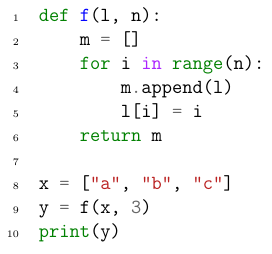

Disegnare inoltre un diagramma che mostri lo stato dell'heap e dello stack al termine dell'esecuzione del codice.

### Soluzione

Questa è la traccia di esecuzione.

<table>
    <thead>
        <tr>
            <th colspan=5>Riga programma
            <th>Valore variabili
            <th>Note
        </tr>
    </thead>
    <tbody>
        <tr><td>8<td><td><td><td><td>x=["a", "b", "c"]<td>
        <tr><td>9<td><td><td><td><td>x=["a", "b", "c"] y=?<td>
        <tr><td><td>1<td><td><td><td>l=["a", "b", "c"] n=3<td>
        <tr><td><td>2<td><td><td><td>l=["a", "b", "c"] n=3 m=[]<td>
        <tr><td><td>3<td><td><td><td>l=["a", "b", "c"] n=3 m=[] i=0<td>
        <tr><td><td>4<td><td><td><td>l=["a", "b", "c"] n=3 m=[] i=0<td>vedi nota qui sotto
        <tr><td><td>5<td><td><td><td>l=[0, "b", "c"] n=3 m=[[0, "b", "c"]] i=0<td>vedi nota qui sotto
        <tr><td><td>3<td><td><td><td>l=[0, "b", "c"] n=3 m=[[0, "b", "c"]] i=1<td>
        <tr><td><td>4<td><td><td><td>l=[0, "b", "c"] n=3 m=[[0, "b", "c"], [0, "b", "c"]] i=1<td>
        <tr><td><td>5<td><td><td><td>l=[0, 1, "c"] n=3 m=[[0, 1, "c"], [0, 1, "c"]] i=1<td>
        <tr><td><td>3<td><td><td><td>l=[0, 1, "c"] n=3 m=[[0, 1, "c"], [0, 1, "c"]] i=2<td>
        <tr><td><td>4<td><td><td><td>l=[0, 1, "c"] n=3 m=[[0, 1, "c"], [0, 1, "c"], [0, 1, "c"]] i=2<td>
        <tr><td><td>5<td><td><td><td>l=[0, 1, 2] n=3 m=[[0, 1, 2], [0, 1, 2], [0, 1, 2]] i=2<td>
        <tr><td><td>6<td><td><td><td>l=[0, 1, 2] n=3 m=[[0, 1, 2], [0, 1, 2], [0, 1, 2]] i=2<td>return [[0, 1, 2], [0, 1, 2], [0, 1, 2]]
        <tr><td>9<td><td><td><td><td>x=[0,1,2] y=[[0, 1, 2], [0, 1, 2], [0, 1, 2]]<td>
        <tr><td>10<td><td><td><td><td>x=[0,1,2] y=[[0, 1, 2], [0, 1, 2], [0, 1, 2]]<td>print [[0, 1, 2], [0, 1, 2], [0, 1, 2]]
    </tbody>
</table>

**Nota**: è importante osservare l'effetto combinato delle righe 4 e 5 del programma. Nella riga 4 alla lista *m*, inizialmente vuota, viene aggiunto il valore di *l*, ovvero `["a", "b", "c"]` per cui il primo elemento di *m* avrà esso stesso valore `["a", "b", "c"]`. Tuttavia, questo primo elemento di *l* non è semplicemente una lista contente i valori `"a", "b", "c"`, ma è proprio *l* stesso. Pertanto, ogni modifica apportata si rifletterà immediatamente anche in *m*. Ecco quindi che alla riga 5, quando rimpiazziamo l'elemento iniziale di *l* con *0*, non solo *l* cambia in `[0, "b", "c"]` ma anche *m* cambia in `[[0, "b", "c"]]`. Fenomeno simile accadrà nelle iterazioni successive del ciclo for.

Questo invece è il grafico con stack e heap alla fine dell'esecuzione del programma.

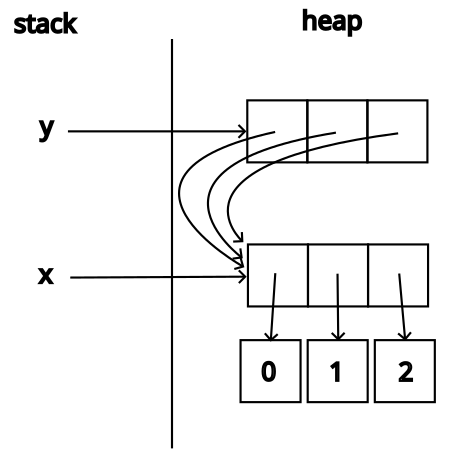

## Esercizio 5

Scrivere la funzione *swap_pair(s)* che prende come parametro una stringa *s* e restituisce la stringa ottenuta scambiando il primo e il secondo carattere di *s*, il terzo e il quarto, e così via. Se la lunghezza di *s* è dispari, l'ultimo carattere non viene scambiato. Ad esempio,
  * `swap_pair("ciao")` restituisce `"icoa"`;
  * `swap_pair("mario")` restituisce `"amiro"`;
  * `swap_pair("")` restituisce `""`.

### Soluzione

In [1]:
def swap_pair(s):
    res = ""
    for i in range(0, len(s)-1, 2):
        res += s[i+1]
        res += s[i]
    if len(s) % 2 != 0:
        res += s[-1]
    return res

E questi sono gli esempi:

In [2]:
swap_pair("ciao")

'icoa'

In [3]:
swap_pair("mario")

'amiro'

In [4]:
swap_pair("")

''

Notare che, poiché le stringhe sono **immutabili**, non è possibile cambiare il valore di un carattere della stringa *s*, per cui istruzioni come 

```python
s[i], s[i+1] = s[i+1], s[i]
```
che ho visto in molte soluzioni **non funzionano** e generano un errore a tempo di esecuzione.

## Esercizio 6

Si descriva in dettaglio il funzionamento degli algoritmi di ricerca lineare e di ricerca binaria. Si discutano le differenze tra i due algoritmi, e si indichi in quali casi è preferibile utilizzare uno piuttosto che l'altro.

Infine, si illustri il funzionamento dei due algoritmi sull'esempio specifico in cui si intende cercare il valore
`9` all'interno della lista `[1, 3, 5, 7, 9, 11, 12, 13, 15, 17, 19]`.



### Soluzione

Gli algoritmi di ricerca lineare e di ricerca binaria prendono come parametri in ingresso una lista *l* ed un oggetto *v*, e restituiscono la posizione di *v* in *l*. Se l'elemento di *v* non si trova in *l*, viene restituito un valore speciale che può essere `None`, `-1`, o un altro valore non valido come posizione.

L'algoritmo di ricerca lineare scandisce la lista *l* un elemento alla volta, finché non trova il valore *v* cercato. Se il valore *v* viene trovato l'algoritmo restituisce la sua posizione. Se la scansione termina senza che *v* sia stato trovato l'algoritmo restituisce il valore speciale cui si accennava sopra. Nel caso ottimo, quando il valore cercato è il primo della lista, l'algoritmo fa un solo accesso alla lista, e la sua complessità è $O(1)$. Nel caso pessimo, quando il valore cercato non si trova nella lista, l'algoritmo deve accedere a tutti gli elementi della lista e la sua complessità è $O(n)$, dove $n$ è la lunghezza della lista *l*.

L'algoritmo di ricerca binaria è molto più efficiente di quello di ricerca lineare, ma funziona solo su liste ordinate. L'idea è di controllare prima di tutto l'elemento centrale della lista, e confrontarlo col valore cercato. Indichiamo nel seguito con *m* la posizione dell'elemento centrale. Di sono tre possibilità:
  * `v == l[m]`: in questo caso abbiamo trovato il valore cercato, e possiamo restituire la sua posizione *m*;
  * `v < l[m]`: in questo caso, poiché la lista è ordinata, siamo sicuri che se il valore *v* si trova nella lista, è sicuramente nella parte *sinistra* della lista, ovvero nelle posizioni tra *0* ed *m-1*. L'algoritmo procede quindi come prima, ma limitatamente a questa sottolista;
  * `v > l[m]`: analogo al caso precedente, ma proseguendo nella sottolista con le posizioni da *m+1* in poi.

L'algoritmo termina se si trova l'elemento *v* o se la sottolista da esaminare diventa vuota, nel qual caso vuol dire che l'elemento cercato non esiste. Nel caso ottimale, cioè quando l'elemento da cercare è nella posizione centrale della lista, la complessità è $O(1)$ come per la ricerca lineare. Nel caso pessimo, poiché a ogni passo la lunghezza della lista da cercare è dimezzata, la complessità è $O(\log n)$, dove $n$ è la lunghezza della lista, contro l'$O(n)$ della ricerca lineare.

Pertanto, se la lista è ordinata è sicuramente meglio usare la ricerca binaria. La ricerca lineare andrebbe usata se la lista non è ordinata oppure è molto corta, per cui la ricerca binaria non porta nessun miglioramento effettivo.

Per quanto riguarda l'esempio specifico.

#### Ricerca lineare

L'algoritmo controlla gli elementi in posizione 0, 1, 2, 3 e 4 (ovvero i nuneri 1, 3, 5, 7, 9). Quando controlla l'elemento in posizione 4 si accorge che è l'elemento cercato e termina restituendo 4.

#### Ricerca binaria

Evidenziamo in giallo la porzione di lista che stiamo esaminando ad ogni passo.

**paso 1**: l'elemento centrale è $11$ in posizione $m=5$.

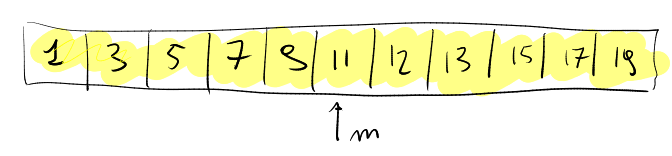

Poiché $9 < 11$, l'algoritmo prosegue nella sottolista che va dalla posizione $0$ alla $5$.

**passo 2**: l'elemento centrale della sottolista sotto esame è $5$ in posizione $2$. 

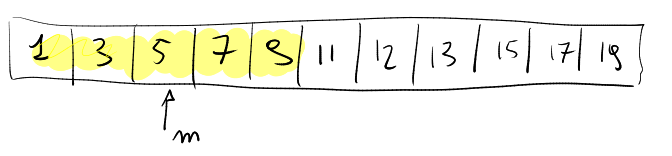

Poiché $9 > 5$, l'algoritmo prosegue nella sottolista che va dalla posizione $3$ alla posizione $4$.

**passo 3**: poiché la sottolista attuale ha un numero pari di elementi, e quindi non esiste un elemento centrale, potrebbe essere scelto o $7$ o $9$, a seconda della specifica implementazione dell'algoritmo. Per semplificare l'esercizio, diciamo che viene scelto il $9$ in posizione $m=4$.

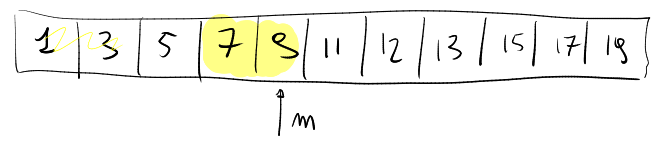

Abbiamo individuato il valore cercato e il programma termina restituendo $4$.



